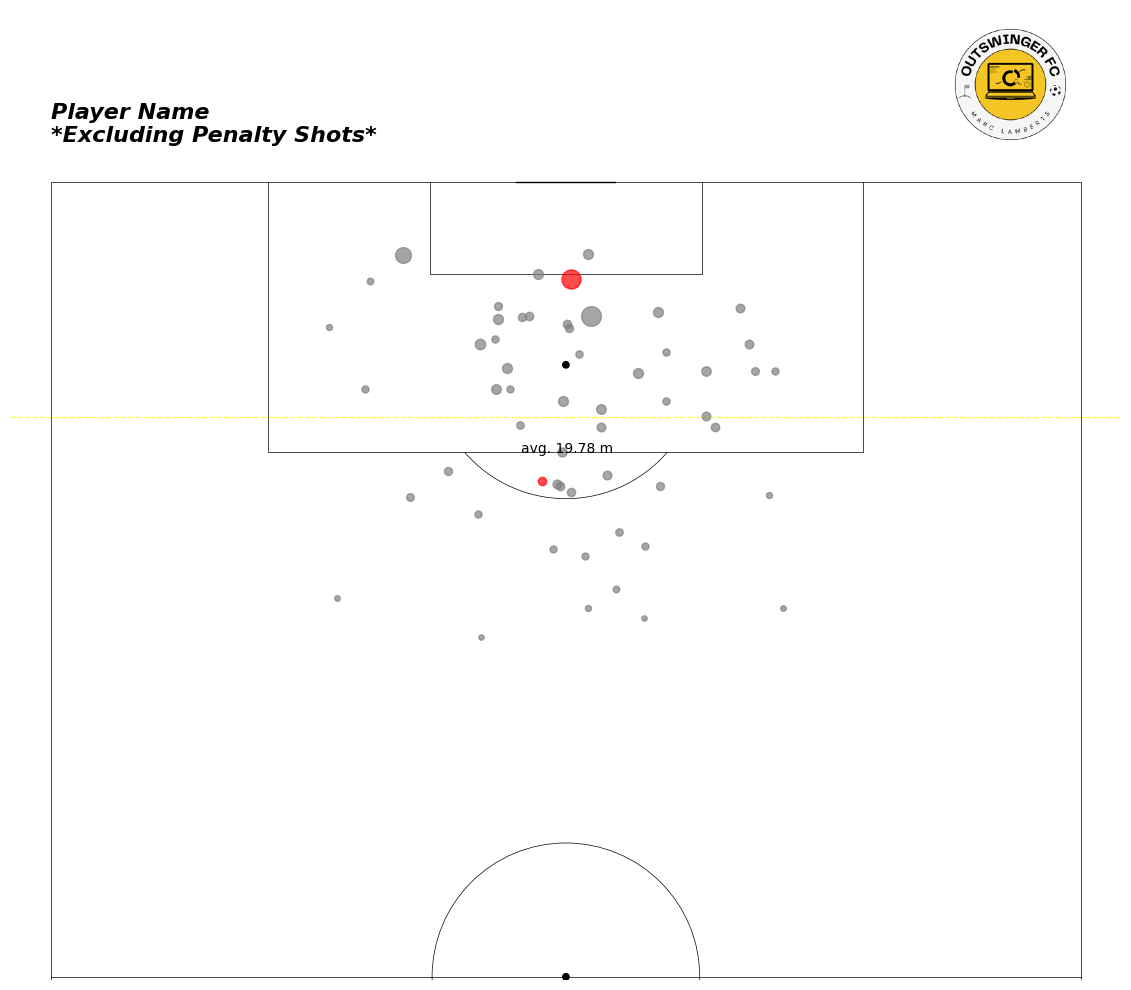

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import VerticalPitch
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Load the Excel file
file_path = r'/Users/marclambertes/Python/NL2xg.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path)

# Filter for the specific team (VVV Venlo)
df = df.loc[df['TeamId'] == 'VVV Venlo'].reset_index()

# Calculate summary statistics
total_shots = df.shape[0]
total_goals = df['isGoal'].sum()
total_xG = df['xG'].sum()
total_xG_from_penalties = df[df['Type_of_play'] == 'Penalty']['xG'].sum()
total_xG_minus_penalties = total_xG - total_xG_from_penalties
xG_per_shot = total_xG / total_shots
avg_distance = 105 - df['x'].mean()  # Assuming a standard pitch length of 105 meters

# Create the pitch
pitch = VerticalPitch(pitch_type='opta', pitch_color='white', line_color='black', half=False, line_zorder=2, linewidth=0.5)
fig, ax = pitch.draw(figsize=(14, 10))  # Larger figure size

# Adjust y-axis to cut at 50 (top of the plot is at y=50)
ax.set_ylim(49.8, 105)  # Display only the area from x=50 to x=105

# Plot the shots using original scatter logic
for x in range(len(df['x'])):
    if df['Type_of_play'][x] == 'FromCorner' and df['isGoal'][x] == True:
        plt.scatter(df['y'][x], df['x'][x], color='red', s=df['xG'][x] * 500, alpha=.7, zorder=3)
    elif df['Type_of_play'][x] == 'FromCorner' and df['isGoal'][x] == False:
        plt.scatter(df['y'][x], df['x'][x], color='grey', s=df['xG'][x] * 500, alpha=.7, zorder=2)
    elif df['Type_of_play'][x] == 'RegularPlay' and df['isGoal'][x] == True:
        plt.scatter(df['y'][x], df['x'][x], color='red', s=df['xG'][x] * 500, alpha=.7, zorder=3)
    elif df['Type_of_play'][x] == 'RegularPlay' and df['isGoal'][x] == False:
        plt.scatter(df['y'][x], df['x'][x], color='grey', s=df['xG'][x] * 500, alpha=.7, zorder=2)
    elif df['Type_of_play'][x] == 'SetPiece' and df['isGoal'][x] == True:
        plt.scatter(df['y'][x], df['x'][x], color='red', s=df['xG'][x] * 500, alpha=.7, zorder=3)
    elif df['Type_of_play'][x] == 'SetPiece' and df['isGoal'][x] == False:
        plt.scatter(df['y'][x], df['x'][x], color='grey', s=df['xG'][x] * 500, alpha=.7, zorder=2)
    elif df['Type_of_play'][x] == 'DirectFreekick' and df['isGoal'][x] == True:
        plt.scatter(df['y'][x], df['x'][x], color='red', s=df['xG'][x] * 500, alpha=.7, zorder=3)
    elif df['Type_of_play'][x] == 'DirectFreekick' and df['isGoal'][x] == False:
        plt.scatter(df['y'][x], df['x'][x], color='grey', s=df['xG'][x] * 500, alpha=.7, zorder=2)
    elif df['Type_of_play'][x] == 'FastBreak' and df['isGoal'][x] == True:
        plt.scatter(df['y'][x], df['x'][x], color='red', s=df['xG'][x] * 500, alpha=.7, zorder=3)
    elif df['Type_of_play'][x] == 'FastBreak' and df['isGoal'][x] == False:
        plt.scatter(df['y'][x], df['x'][x], color='grey', s=df['xG'][x] * 500, alpha=.7, zorder=2)
    elif df['Type_of_play'][x] == 'Penalty' and df['isGoal'][x] == True:
        plt.scatter(df['y'][x], df['x'][x], color='red', s=df['xG'][x] * 500, alpha=.7, zorder=3)
    elif df['Type_of_play'][x] == 'Penalty' and df['isGoal'][x] == False:
        plt.scatter(df['y'][x], df['x'][x], color='grey', s=df['xG'][x] * 500, alpha=.7, zorder=2)
    elif df['Type_of_play'][x] == 'ThrowinSetPiece' and df['isGoal'][x] == True:
        plt.scatter(df['y'][x], df['x'][x], color='red', s=df['xG'][x] * 500, alpha=.7, zorder=3)
    elif df['Type_of_play'][x] == 'ThrowinSetPiece' and df['isGoal'][x] == False:
        plt.scatter(df['y'][x], df['x'][x], color='grey', s=df['xG'][x] * 500, alpha=.7, zorder=2)

# Add average shot distance line
avg_y = df['x'].mean()
avg_x = df['y'].mean()
plt.axhline(y=avg_y, color='yellow', linestyle='dashed', linewidth=1, alpha=0.7, zorder=1)
plt.text(avg_x + 5, avg_y - 2, f'avg. {avg_distance:.2f} m', fontsize=10, color='black', ha='left', va='center')

# Add left top corner title
player_name = "Player Name"  # Replace with the actual player name
title_text = f"{player_name}  \n*Excluding Penalty Shots*"
plt.text(100, 105, title_text, fontsize=16, weight='bold', style='italic', color='black', ha='left', va='top')

# Add logo to the top-right corner and make it bigger
logo_path = r'Outswinger FC (3).png'  # Replace with the path to your logo file
logo_img = plt.imread(logo_path)
imagebox = OffsetImage(logo_img, zoom=0.5)  # Increased zoom to make the logo bigger
ab = AnnotationBbox(imagebox, (0.9, 1.02), frameon=False, xycoords='axes fraction', box_alignment=(0.5, 0.5))  # Shifted to the right
ax.add_artist(ab)

# Save and display the plot
plt.savefig('shotmap_vvv_venlo.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()


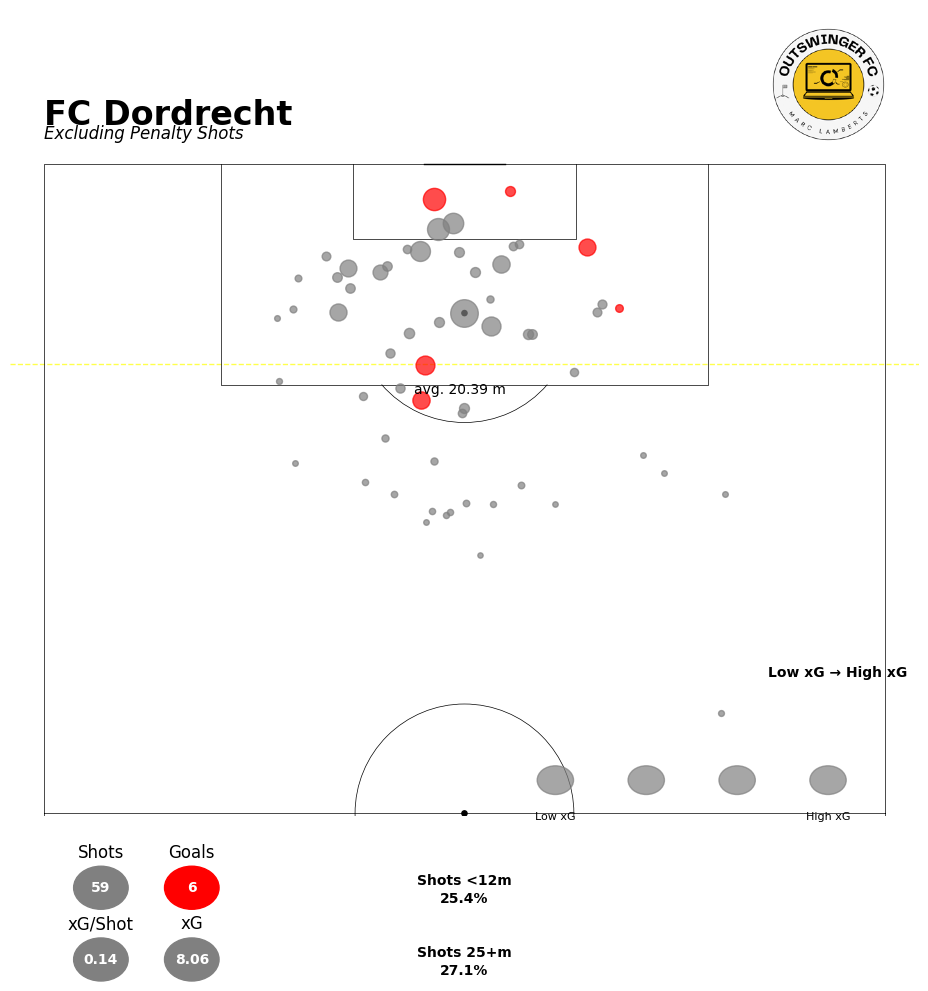

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import VerticalPitch
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.patches import Circle

# Load the Excel file
file_path = r'/Users/marclambertes/Python/NL2xg.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path)

# Filter for the specific team (VVV Venlo)
df = df.loc[df['TeamId'] == 'FC Dordrecht'].reset_index()

# Calculate summary statistics
total_shots = df.shape[0]
total_goals = df['isGoal'].sum()
total_xG = df['xG'].sum()
total_xG_from_penalties = df[df['Type_of_play'] == 'Penalty']['xG'].sum()
total_xG_minus_penalties = total_xG - total_xG_from_penalties
xG_per_shot = total_xG / total_shots
avg_distance = 105 - df['x'].mean()  # Assuming a standard pitch length of 105 meters

# Create the pitch
pitch = VerticalPitch(pitch_type='opta', pitch_color='white', line_color='black', half=False, line_zorder=2, linewidth=0.5)
fig, ax = pitch.draw(figsize=(14, 10))  # Larger figure size

# Adjust y-axis to cut at 50 (top of the plot is at y=50)
ax.set_ylim(49.8, 105)  # Display only the area from x=50 to x=105

# Plot the shots
for x in range(len(df['x'])):
    if df['Type_of_play'][x] == 'FromCorner' and df['isGoal'][x]:
        plt.scatter(df['y'][x], df['x'][x], color='red', s=df['xG'][x] * 500, alpha=.7, zorder=3)
    elif df['Type_of_play'][x] == 'FromCorner':
        plt.scatter(df['y'][x], df['x'][x], color='grey', s=df['xG'][x] * 500, alpha=.7, zorder=2)
    elif df['Type_of_play'][x] == 'RegularPlay' and df['isGoal'][x]:
        plt.scatter(df['y'][x], df['x'][x], color='red', s=df['xG'][x] * 500, alpha=.7, zorder=3)
    elif df['Type_of_play'][x] == 'RegularPlay':
        plt.scatter(df['y'][x], df['x'][x], color='grey', s=df['xG'][x] * 500, alpha=.7, zorder=2)
    elif df['Type_of_play'][x] == 'SetPiece' and df['isGoal'][x]:
        plt.scatter(df['y'][x], df['x'][x], color='red', s=df['xG'][x] * 500, alpha=.7, zorder=3)
    elif df['Type_of_play'][x] == 'SetPiece':
        plt.scatter(df['y'][x], df['x'][x], color='grey', s=df['xG'][x] * 500, alpha=.7, zorder=2)
    elif df['Type_of_play'][x] == 'DirectFreekick' and df['isGoal'][x]:
        plt.scatter(df['y'][x], df['x'][x], color='red', s=df['xG'][x] * 500, alpha=.7, zorder=3)
    elif df['Type_of_play'][x] == 'DirectFreekick':
        plt.scatter(df['y'][x], df['x'][x], color='grey', s=df['xG'][x] * 500, alpha=.7, zorder=2)
    elif df['Type_of_play'][x] == 'FastBreak' and df['isGoal'][x]:
        plt.scatter(df['y'][x], df['x'][x], color='red', s=df['xG'][x] * 500, alpha=.7, zorder=3)
    elif df['Type_of_play'][x] == 'FastBreak':
        plt.scatter(df['y'][x], df['x'][x], color='grey', s=df['xG'][x] * 500, alpha=.7, zorder=2)
    elif df['Type_of_play'][x] == 'Penalty' and df['isGoal'][x]:
        plt.scatter(df['y'][x], df['x'][x], color='red', s=df['xG'][x] * 500, alpha=.7, zorder=3)
    elif df['Type_of_play'][x] == 'Penalty':
        plt.scatter(df['y'][x], df['x'][x], color='grey', s=df['xG'][x] * 500, alpha=.7, zorder=2)
    elif df['Type_of_play'][x] == 'ThrowinSetPiece' and df['isGoal'][x]:
        plt.scatter(df['y'][x], df['x'][x], color='red', s=df['xG'][x] * 500, alpha=.7, zorder=3)
    elif df['Type_of_play'][x] == 'ThrowinSetPiece':
        plt.scatter(df['y'][x], df['x'][x], color='grey', s=df['xG'][x] * 500, alpha=.7, zorder=2)

# Add average shot distance line
avg_y = df['x'].mean()
avg_x = df['y'].mean()
plt.axhline(y=avg_y, color='yellow', linestyle='dashed', linewidth=1, alpha=0.7, zorder=1)
plt.text(avg_x + 5, avg_y - 2, f'avg. {avg_distance:.2f} m', fontsize=10, color='black', ha='left', va='center')

# Add left top corner title
player_name = "FC Dordrecht"  # Replace with the actual player name
title_text = f"{player_name}"
subtitle_text = "Excluding Penalty Shots"

# Add the title
ax.text(100, 105, title_text, fontsize=24, weight='bold', color='black', ha='left', va='top')

# Add the subtitle in italics
ax.text(100, 103, subtitle_text, fontsize=12, style='italic', color='black', ha='left', va='top')
# Add logo to the top-right corner
logo_path = r'Outswinger FC (3).png'  # Replace with the path to your logo file
logo_img = plt.imread(logo_path)
imagebox = OffsetImage(logo_img, zoom=0.5)
ab = AnnotationBbox(imagebox, (0.9, 1.02), frameon=False, xycoords='axes fraction', box_alignment=(0.5, 0.5))
ax.add_artist(ab)

# Calculate distances from the goal line

# Calculate percentages for shots <12 meters and 25+ meters from the goal line
shots_less_12m = (df[df['distance'] <= 12].shape[0] / total_shots) * 100  # Shots <12 meters
shots_more_25m = (df[df['distance'] >= 25].shape[0] / total_shots) * 100  # Shots 25+ meters


# Adjust the plot to add extra space below the pitch
plt.subplots_adjust(bottom=0.35)  # Add extra margin for the new boxes

# Define positions, labels, values, and colors for the circles
circle_positions = [(0.1, -0.10), (0.1, -0.2), (0.2, -0.10), (0.2, -0.2)]  # Adjusted positions
circle_texts = ["Shots", "xG/Shot", "Goals", "xG"]  # Text labels for circles
values = [
    total_shots,
    round(xG_per_shot, 2),
    total_goals,
    round(total_xG, 2)
]  # Values to display inside the circles
circle_colors = ["grey", "grey", "red", "grey"]  # Colors for each circle

# Plot circles with text above and values inside
for pos, text, value, color in zip(circle_positions, circle_texts, values, circle_colors):
    # Create a colored circle
    circle = Circle(pos, 0.03, transform=ax.transAxes, color=color, zorder=5, clip_on=False)  # Adjust radius
    ax.add_artist(circle)
    # Add the text label above the circle
    ax.text(pos[0], pos[1] + 0.05, text, transform=ax.transAxes, color='black', fontsize=12,
            ha='center', va='center', zorder=6)
    # Add the value inside the circle
    ax.text(pos[0], pos[1], value, transform=ax.transAxes, color='white', fontsize=10,
            weight='bold', ha='center', va='center', zorder=6)

# Define positions for the boxes and their content
box_positions = [(0.5, -0.10), (0.5, -0.2)]  # Stacked positions for the boxes
box_texts = ["Shots <12m", "Shots 25+m"]  # Text labels for the boxes
box_values = [f"{shots_less_12m:.1f}%", f"{shots_more_25m:.1f}%"]  # Percentage values for the boxes

# Plot white boxes with black text
for pos, text, value in zip(box_positions, box_texts, box_values):
    # Draw the box with a white fill and black border
    ax.add_patch(plt.Rectangle(
        (pos[0] - 0.05, pos[1] - 0.03), 0.1, 0.06, transform=ax.transAxes,
        color='white', zorder=5, clip_on=False, edgecolor='black', linewidth=1
    ))
    # Add the text label inside the box
    ax.text(pos[0], pos[1] + 0.01, text, transform=ax.transAxes, color='black', fontsize=10,
            weight='bold', ha='center', va='center', zorder=6)
    # Add the value below the label inside the box
    ax.text(pos[0], pos[1] - 0.015, value, transform=ax.transAxes, color='black', fontsize=10,
            weight='bold', ha='center', va='center', zorder=6)
# Adjust the plot to add space for the xG size visualization
plt.subplots_adjust(bottom=0.25, right=0.85)  # Adding extra space on the right and bottom

# Define positions for circles (xG sizes) and their corresponding labels
circle_sizes = [100, 200, 400, 600]  # Sizes for xG representation
circle_labels = ["Low xG", "", "", "High xG"]  # Labels to indicate low to high xG
circle_positions = [(0.6, 0.05), (0.7, 0.05), (0.8, 0.05), (0.9, 0.05)]  # Fixed x-y coordinates for the circles

# Plot circles and labels
for size, label, position in zip(circle_sizes, circle_labels, circle_positions):
    # Plot the circle
    ax.add_artist(plt.Circle(position, radius=0.02, transform=ax.transAxes,
                             color='grey', alpha=0.7, zorder=5))
    # Add the label below the circles
    if label:  # Avoid empty strings
        ax.text(position[0], position[1] - 0.05, label, transform=ax.transAxes, fontsize=8,
                color='black', ha='center', va='center')

# Add "Low xG → High xG" label for better context
ax.text(0.91, 0.2, "Low xG → High xG", transform=ax.transAxes, fontsize=10,
        color='black', ha='center', va='center', weight='bold')


plt.savefig('shotmap_with_circles_indicator.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()


